In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import collections

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image as im

In [2]:
df = pd.read_excel("Datasets/realDonaldTrumpsincemayprotest2.xlsx", sep='\t', 
                   names=["Tweet_ID", "Date", "Text"])

In [3]:
#Excel file did not have a proper heading so we needed to create one
##Ref: https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
df = pd.DataFrame(df)
df.head()

,Tweet_ID,Date,Text
0,1272269338892959744,2020-06-14 20:47:02,Interesting how ANTIFA and other Far Left mili...
1,1272266206691672064,2020-06-14 20:34:35,Does anyone notice how little the Radical Left...
2,1272172806579662851,2020-06-14 14:23:27,https://t.co/gjBMFDbUps
3,1272172568670330883,2020-06-14 14:22:30,RT @DeptofDefense: First to fight! Happy birth...
4,1272172511560634368,2020-06-14 14:22:17,"RT @USArmy: Today, we recognize 245 years of b..."


In [4]:
#Create recent wordcloud and most common words that Donald Trump has tweeted since the George Floyd murder by cops
tweets = df["Text"]

In [5]:
tweets

0      Interesting how ANTIFA and other Far Left mili...
1      Does anyone notice how little the Radical Left...
2                                https://t.co/gjBMFDbUps
3      RT @DeptofDefense: First to fight! Happy birth...
4      RT @USArmy: Today, we recognize 245 years of b...
5      RT @ErrolWebber: America is better for having ...
6      RT @mikandynothem: Happy Birthday Mr. Presiden...
7              Thank you Philip! https://t.co/jGspqbtSgL
8      Michael Moore: I‘m ‘Begging‘ Dems -- Don‘t Und...
9      RT @markknoller: "You became brothers &amp; si...
10     RT @markknoller: Pres begins Commencement Addr...
11     RT @markknoller: Pres escorted on stage and sa...
12     RT @markknoller: Pres Trump and Gen Williams g...
13     RT @GoArmyWestPoint: Flyover + Hat Toss = Cele...
14     A great day at West Point! https://t.co/oJyXsI...
15     The ramp that I descended after my West Point ...
16     RT @SenatorTimScott: Despite the challenges ah...
17     RT @AmberSmithUSA: Fanta

In [6]:
raw_string = ''.join(tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [7]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, any smaller words ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS] #from a built in list of stopwords

In [8]:
words

['interesting',
 'antifa',
 'far',
 'left',
 'militant',
 'groups',
 'take',
 'city',
 'without',
 'barely',
 'wimpier',
 'soft',
 'anyone',
 'notice',
 'little',
 'radical',
 'left',
 'takeover',
 'seattle',
 'discussed',
 'fake',
 'news',
 'media',
 'deptofdefense',
 'first',
 'fight',
 'happy',
 'birthday',
 'usarmy',
 'fighting',
 'til',
 'battle',
 'won',
 'thank',
 'rolling',
 'along',
 'yearrt',
 'usarmy',
 'today',
 'recognize',
 'years',
 'bravery',
 'commitment',
 'skill',
 'answering',
 'call',
 'serve',
 'americas',
 'armyarmybdart',
 'errolwebber',
 'america',
 'better',
 'potus',
 'realdonaldtrumphappybirthdaytrump',
 'mikandynothem',
 'happy',
 'birthday',
 'presidentamerica',
 'blessed',
 'beyond',
 'measure',
 'white',
 'house',
 'youre',
 'promoting',
 'thathank',
 'philip',
 'moore',
 'begging',
 'dems',
 'dont',
 'underestimate',
 'white',
 'male',
 'trump',
 'supporters',
 'rage',
 'emotion',
 'markknoller',
 'became',
 'brothers',
 'amp',
 'sisters',
 'pledging',


In [9]:
words = [w for w in words if w != 'realdonaldtrump']
words = [w for w in words if w != 'amp']
words = [w for w in words if w != 'will']
words

['interesting',
 'antifa',
 'far',
 'left',
 'militant',
 'groups',
 'take',
 'city',
 'without',
 'barely',
 'wimpier',
 'soft',
 'anyone',
 'notice',
 'little',
 'radical',
 'left',
 'takeover',
 'seattle',
 'discussed',
 'fake',
 'news',
 'media',
 'deptofdefense',
 'first',
 'fight',
 'happy',
 'birthday',
 'usarmy',
 'fighting',
 'til',
 'battle',
 'won',
 'thank',
 'rolling',
 'along',
 'yearrt',
 'usarmy',
 'today',
 'recognize',
 'years',
 'bravery',
 'commitment',
 'skill',
 'answering',
 'call',
 'serve',
 'americas',
 'armyarmybdart',
 'errolwebber',
 'america',
 'better',
 'potus',
 'realdonaldtrumphappybirthdaytrump',
 'mikandynothem',
 'happy',
 'birthday',
 'presidentamerica',
 'blessed',
 'beyond',
 'measure',
 'white',
 'house',
 'youre',
 'promoting',
 'thathank',
 'philip',
 'moore',
 'begging',
 'dems',
 'dont',
 'underestimate',
 'white',
 'male',
 'trump',
 'supporters',
 'rage',
 'emotion',
 'markknoller',
 'became',
 'brothers',
 'sisters',
 'pledging',
 'allegi

In [10]:
logo = np.array(Image.open('Datasets/10wmt-superJumbo-v4.jpg'))

In [11]:
#Use same Twitter Bird logo for this section of the project
wc = WordCloud(background_color="white", max_words=100, mask=logo)
clean_string = ','.join(words)
wc.generate(clean_string)

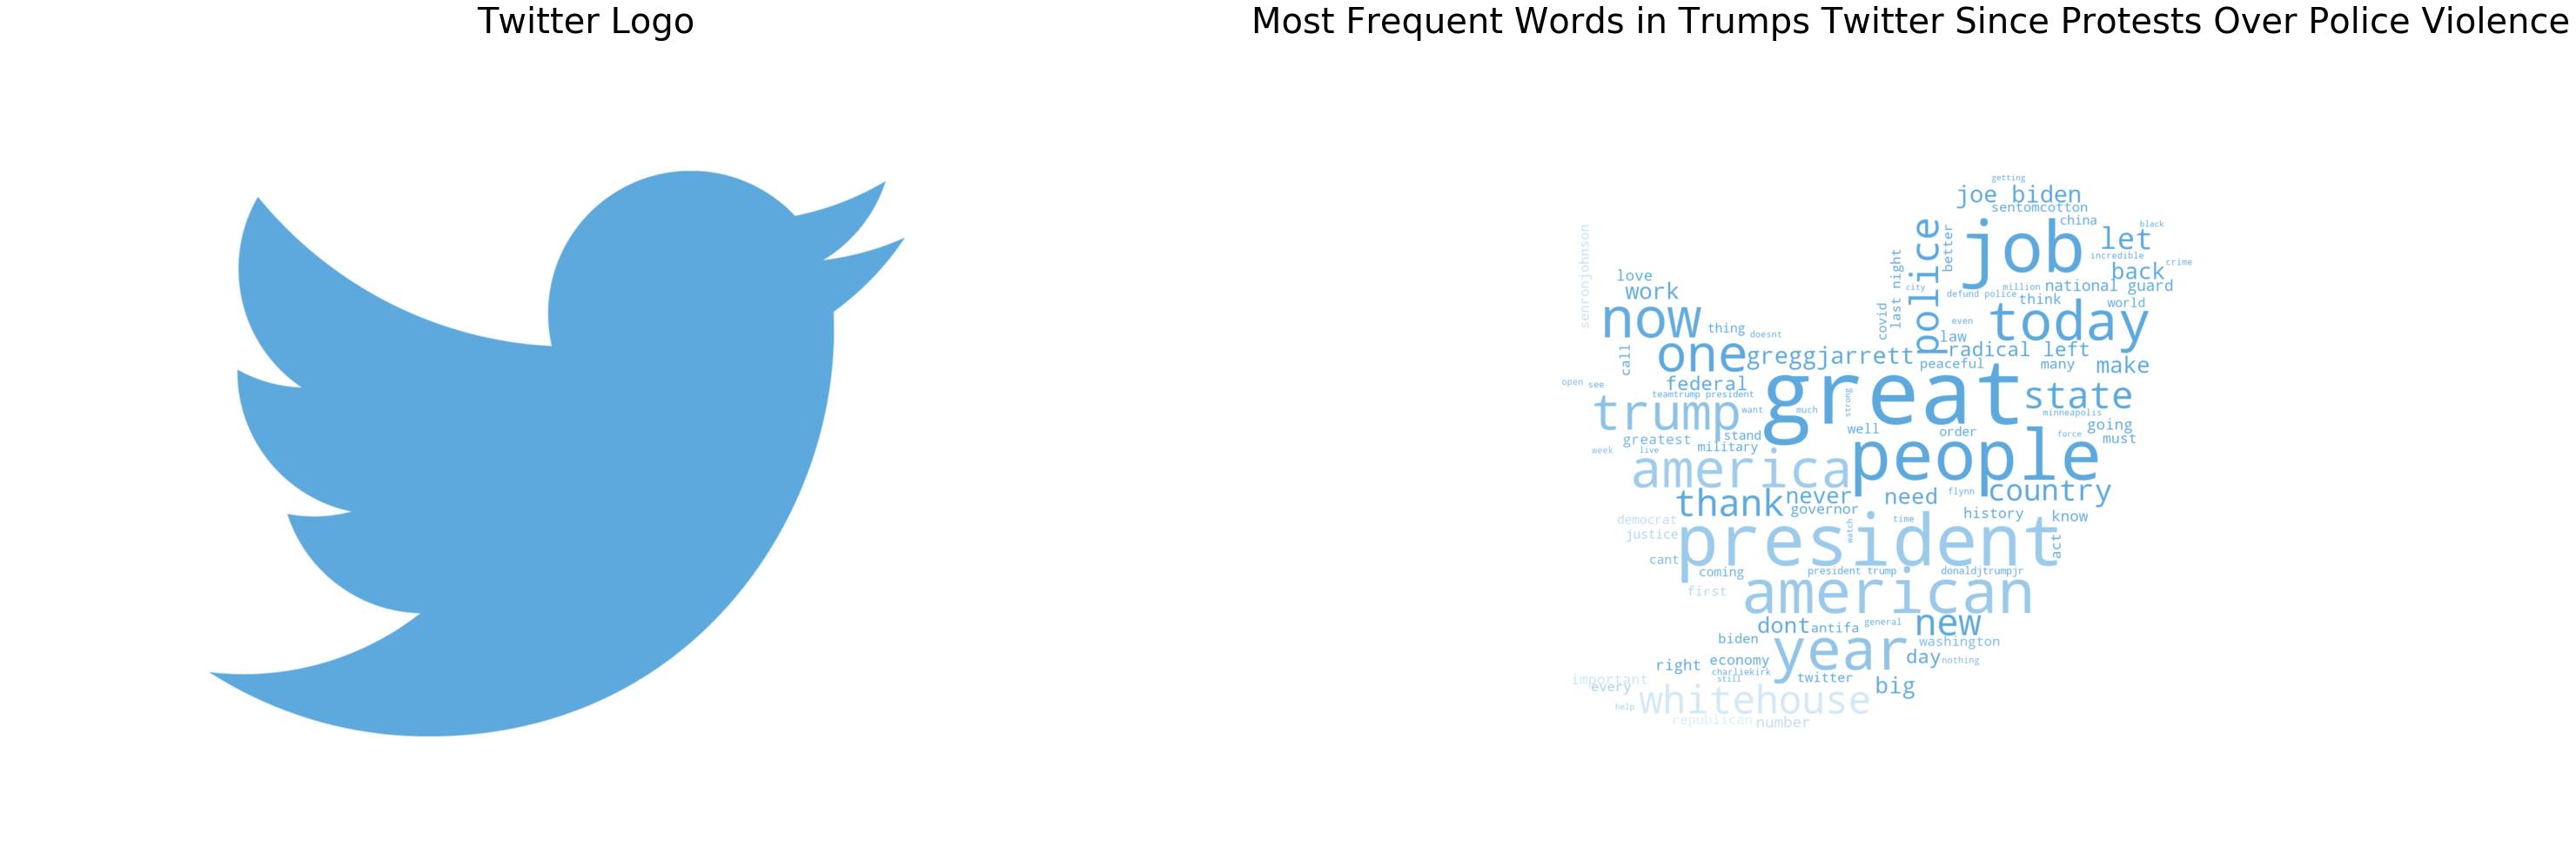

In [12]:
#Side by Side Comparison, the Twitter Logo will be reused because the logo is relevant and overall neutral
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Twitter Logo', size=40)
plt.axis("off")

image_colors_1 = ImageColorGenerator(logo)

f.add_subplot(1,2, 2)
plt.imshow(wc.recolor(color_func=image_colors_1), interpolation='bilinear')
plt.title('Most Frequent Words in Trumps Twitter Since Protests Over Police Violence', size=40)
plt.axis("off")

plt.savefig("Visualizations/Words_Most_Common_Since_Floyd_Protests")
plt.show()

In [13]:
# Top 50 Words
frequent_words = [word for word in words]
counted_words = collections.Counter(frequent_words)

words_list = []
counts = []
for letter, count in counted_words.most_common(20):
    words_list.append(letter)
    counts.append(count)

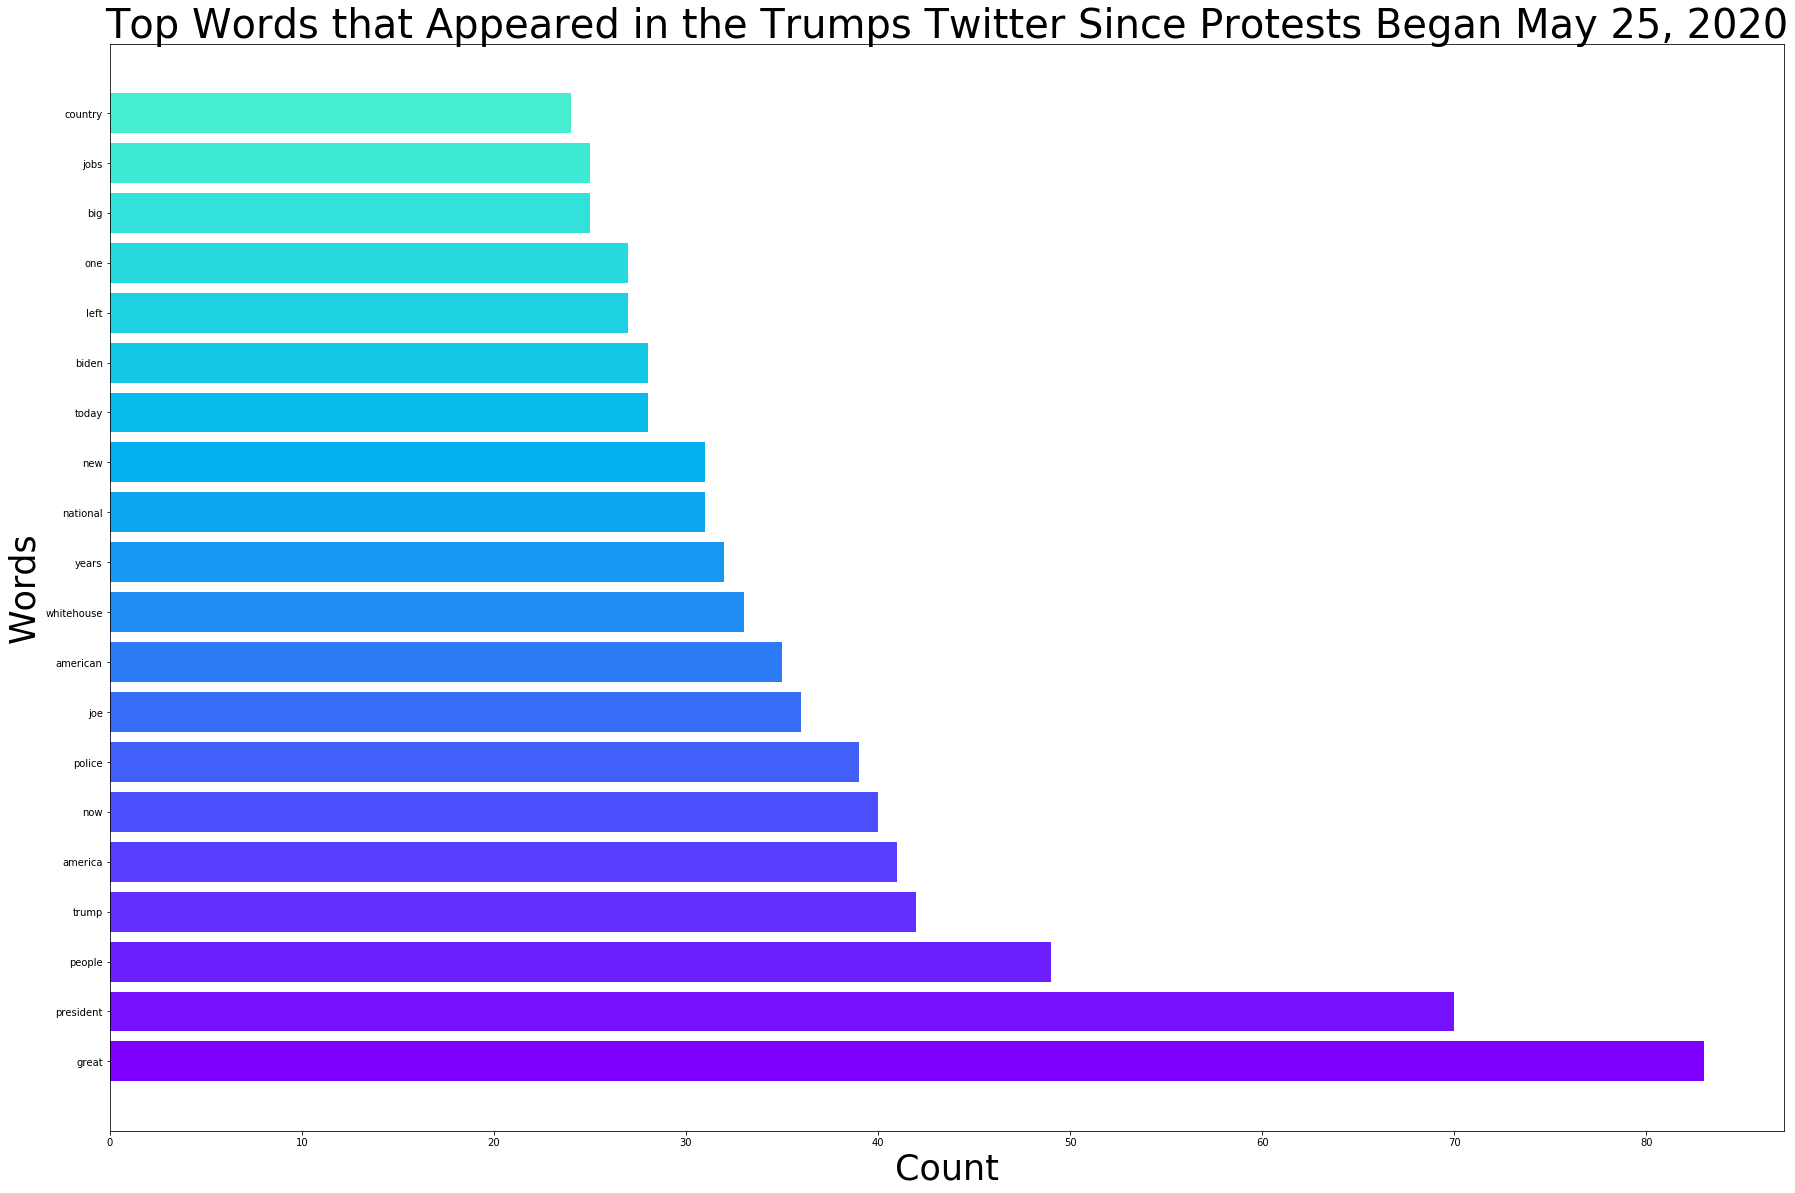

In [14]:
colors = cm.rainbow(np.linspace(0, 1, 50))


plt.figure(figsize=(30,20))
plt.title('Top Words that Appeared in the Trumps Twitter Since Protests Began May 25, 2020', fontsize = 40)
plt.xlabel('Count', size = 35)
plt.ylabel('Words', size = 35)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.barh(words_list, counts, color=colors)

plt.savefig("Visualizations/Top_20_Words_Since_May_25th_Graph")
plt.show()

## How Has Trump Used Twitter Since George Floyd and Subsequent Protests?

Following a string of activism and protests in the wake of the George Floyd murder by Minneapolis cops, Trump appears to have his mind on other things, although he does mention Minneapolis enough to be a top 20 word in his tweets. However, he seems to mention conservative news outlets that align with his ideals, alongside mentions of Obama and Joe Biden, political antagonists to him. It can be said that Trump cares more for talking about his political rivals rather than provide condolences or showing that he supports the protests in any way. He still likes to reiterate what a great job he is doing despite the current situation and his handling of recent events.

## How Many Times Has Trump Used the Words Protests, Looting, Riots?

In [15]:
## Words to count: rioters, protests,thieves, vandals, carnage, riots, peaceful
target_list = []
target_count = []
target_words = ['peaceful', 'protests', 'thieves', 'looting', 'looters', 'vandals','rioters','riot', 'riots', 'carnage']


new_target_words = [w for w in words if w in target_words]

In [16]:
counted_target_words = collections.Counter(new_target_words)

for letter, count in counted_target_words.most_common(20):
    target_list.append(letter)
    target_count.append(count)

In [17]:
new_target_words

['riots',
 'peaceful',
 'looters',
 'looting',
 'peaceful',
 'looting',
 'carnage',
 'peaceful',
 'peaceful',
 'protests',
 'peaceful',
 'peaceful',
 'looters',
 'looters',
 'looting',
 'peaceful',
 'looting',
 'looting',
 'thieves',
 'vandals',
 'rioters',
 'carnage',
 'protests',
 'riots',
 'looters',
 'riots',
 'peaceful',
 'rioters',
 'peaceful',
 'riots',
 'peaceful',
 'rioters',
 'looters',
 'peaceful',
 'peaceful',
 'protests',
 'peaceful',
 'rioters',
 'looting',
 'rioters',
 'peaceful',
 'rioters',
 'looting',
 'riots',
 'looting']

In [18]:
target_count

[14, 8, 6, 5, 5, 3, 2, 1, 1]

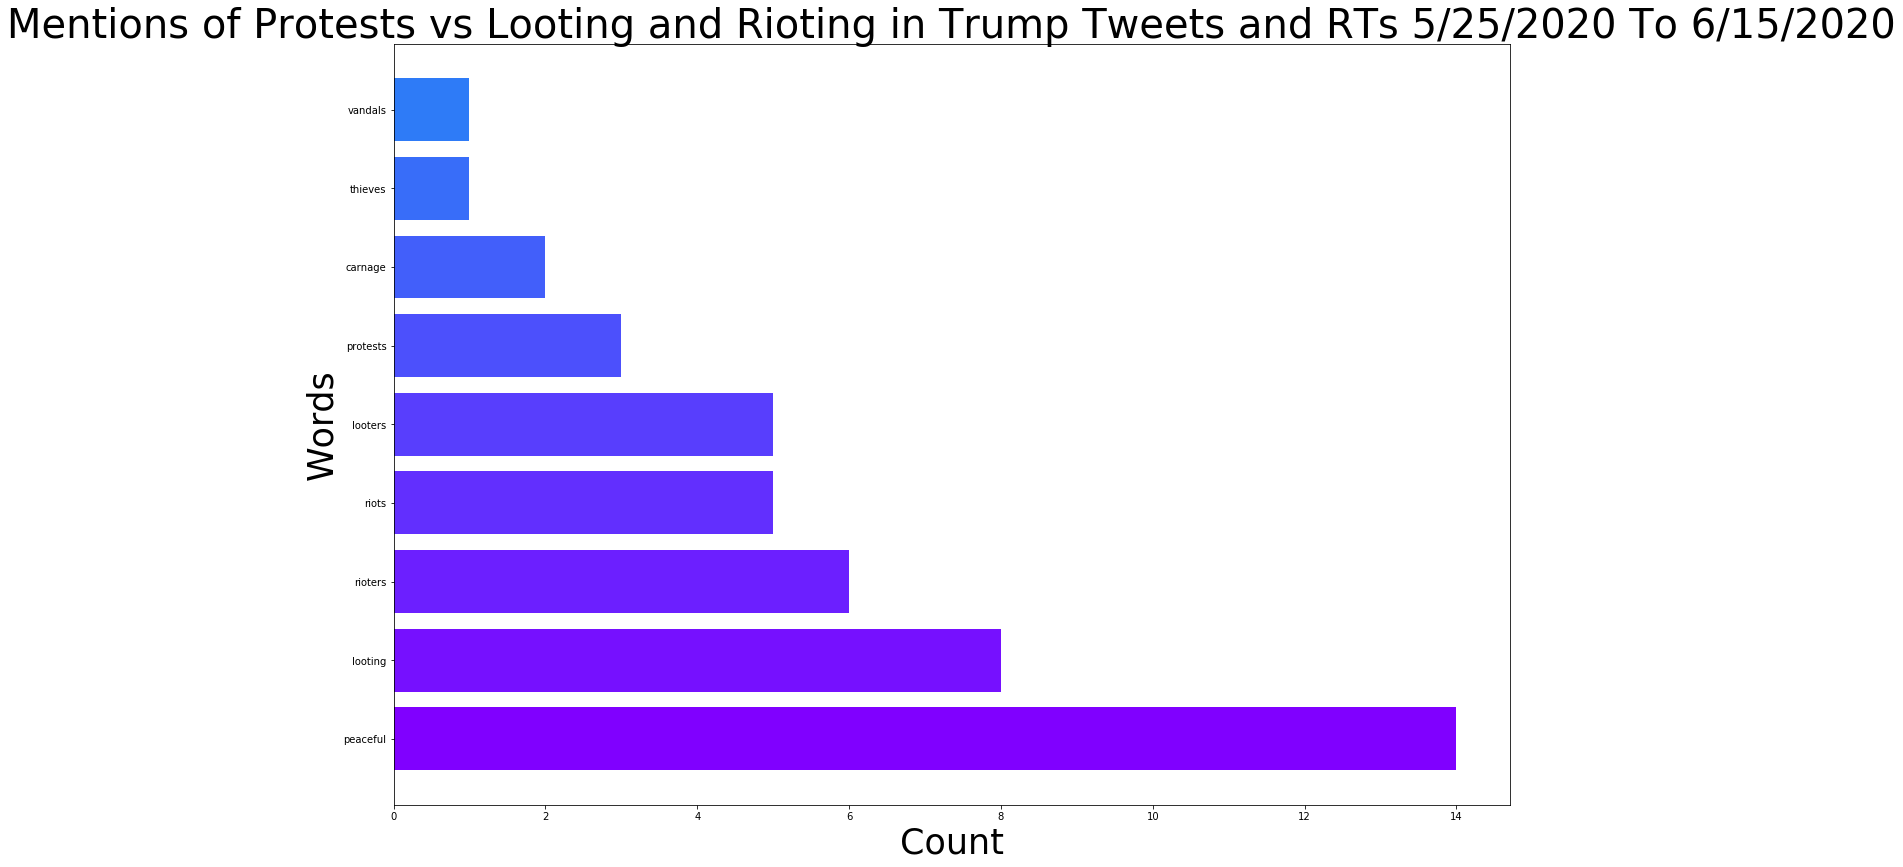

In [19]:
colors = cm.rainbow(np.linspace(0, 1, 50))


plt.figure(figsize=(20,14))
plt.title('Mentions of Protests vs Looting and Rioting in Trump Tweets and RTs 5/25/2020 To 6/15/2020', fontsize = 40)
plt.xlabel('Count', size = 35)
plt.ylabel('Words', size = 35)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.barh(target_list, target_count, color=colors)

plt.savefig("Visualizations/Mentions_of_Protests_and_Riots_Count_Up_To_6_15")
plt.show()

## Trump Mentions Rioters and Looting in Tweets and RTs More Than Peaceful and Protests

Its clear where Trumps priorities land. A separate graph had to be made since much of these words didnt appear in the top 20 graph, and there needs to be a clearer picture of how often words related to the protest are mentioned in the tweets and RTs of the US president. Here, its clear that the president chooses to see the protests as violent, though there are considerable mentions of peaceful protests. Since 'rioters' appears more than 'peaceful', its clear that the president antagonizes the current situation and chooses to see the negative aspects of the situation.